In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from preproc import *

In [7]:
%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (15, 8)

In [3]:
!ls interpolated/ | grep 08

NG1988812H_Maganna_Gustavo_(til:20-05-21)_(from:20-05-08)_interpolated.csv
NG1988812H_Maganna_Gustavo_(til:20-05-30)_(from:20-03-08)_interpolated.csv
NG1988812H_Maganna_Gustavo_(til:20-06-04)_(from:20-05-08)_interpolated.csv
NG1988812H_Maganna_Gustavo_(til:20-07-07)_(from:20-06-08)_interpolated.csv
NG1988812H_Maganna_Gustavo_(til:20-07-14)_(from:20-07-08)_interpolated.csv
NG1988812H_Maganna_Gustavo_(til:20-08-06)_(from:20-06-07)_interpolated.csv
NG1988812H_Maganna_Gustavo_(til:20-08-11)_(from:20-05-14)_interpolated.csv


In [13]:
#!ls | grep toml
config = parse_config("preproc.toml")

In [4]:
data = import_csv("interpolated/NG1988812H_Maganna_Gustavo_(til:20-08-11)_(from:20-05-14)_interpolated.csv")

In [16]:
data["ISIG Value"] = new_hybrid_interpolator(
    data["ISIG Value"],
    **config.interpolation.specs
)

In [20]:
data["ISIG Value"] = data["ISIG Value"] / data["ISIG Value"].max()

In [21]:
data["Sensor Glucose (mg/dL)"] = data["Sensor Glucose (mg/dL)"] / data["Sensor Glucose (mg/dL)"].max()

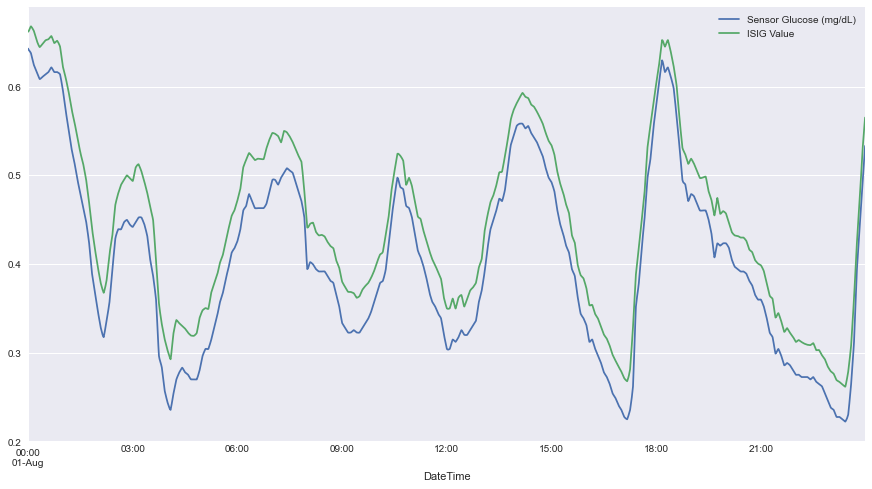

In [27]:
subset = data["2020-08-01"]
subset[["Sensor Glucose (mg/dL)", "ISIG Value"]].plot()